In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (404, 13)
Testing Data Shape: (102, 13)


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 557.0852 - mae: 21.7108 - val_loss: 606.7411 - val_mae: 22.8301
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 528.4503 - mae: 21.1282 - val_loss: 556.6152 - val_mae: 21.7167
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 461.6688 - mae: 19.3749 - val_loss: 491.6961 - val_mae: 20.2002
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 399.2790 - mae: 17.8194 - val_loss: 405.7586 - val_mae: 18.0368
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 338.0316 - mae: 15.9090 - val_loss: 304.2223 - val_mae: 15.1125
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 240.6124 - mae: 13.0007 - val_loss: 202.9021 - val_mae: 11.4474
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 130.7237 - mae: 9.0192 - val_loss: 131.1065 - val_mae: 8.5549
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 111.7723 - mae: 7.7570 - val_loss: 93.3979 - val_mae: 7.0941
Epoch 9/100


In [6]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Test Loss (MSE): {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")


4/4 - 0s - 14ms/step - loss: 27.8953 - mae: 3.2384
Test Loss (MSE): 27.90
Test MAE: 3.24


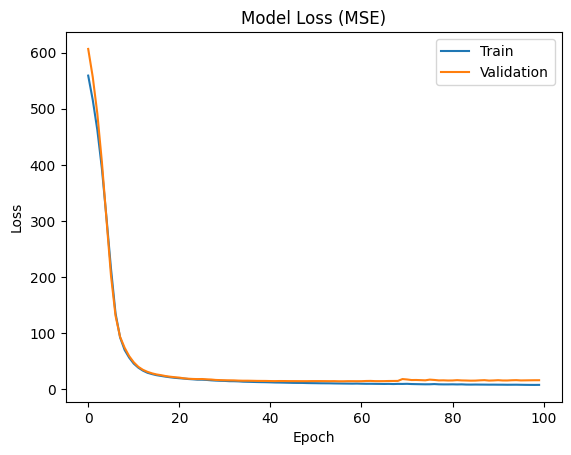

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [8]:
predictions = model.predict(X_test_scaled)

for i in range(5):
    print(f"Predicted Price: {predictions[i][0]:.2f}, Actual Price: {y_test[i]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Price: 8.40, Actual Price: 7.2
Predicted Price: 18.58, Actual Price: 18.8
Predicted Price: 20.72, Actual Price: 19.0
Predicted Price: 31.56, Actual Price: 27.0
Predicted Price: 26.41, Actual Price: 22.2
